In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_year = pd.read_csv("data/niederschlag_jahreswerte.csv",index_col=0)

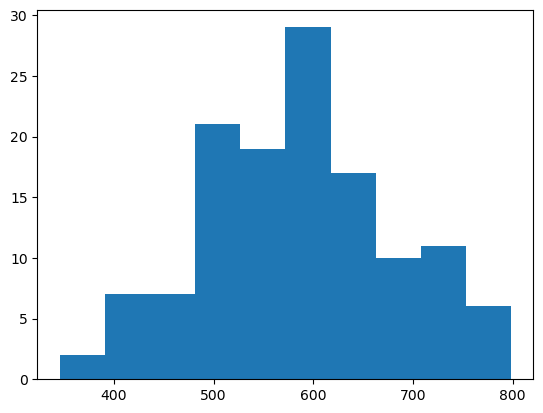

In [3]:
plt.hist(data_year)
plt.show()

Importieren von Scipy:

In [4]:
from scipy import stats

In [5]:
dist = getattr(stats, 'norm')



Parameter fitten mit der Maximum Likely Hoo

In [6]:
parameters = dist.fit(data_year)
print(parameters)

mu = parameters[0]
sigma = parameters[1]

(585.3449612403101, 96.10862714160997)


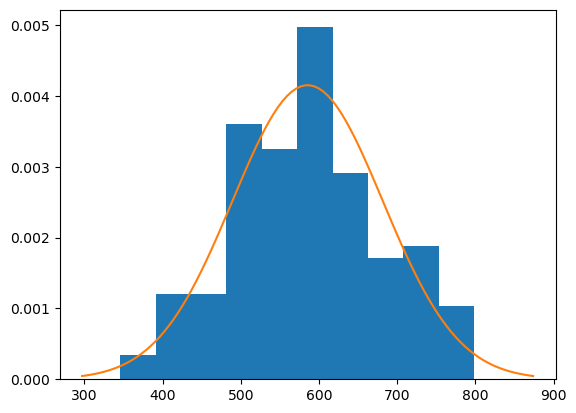

In [7]:
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.hist(data_year, density=True)# Density=True normiert die Daten, sodass das Integral über die Daten 1 ergibt

plt.plot(x, stats.norm.pdf(x, mu, sigma))

plt.show()

In [8]:
res = stats.shapiro(data_year)

Teste, ob die Daten Normalverteilt sind (Shapiro-Test)

In [9]:
if res.pvalue > 0.05:
    print("Die Nullhypothese das die Werte Normalverteilt sind, kann angenommen werden")
else:
    print("Die Nullhypothese das die Werte Normalverteilt sind, kann nicht angenommen werden")


Die Nullhypothese das die Werte Normalverteilt sind, kann angenommen werden


In [10]:
data_day = pd.read_csv("data/niederschlag_tageswerte.csv",index_col=0)

Darstellen der Werte:

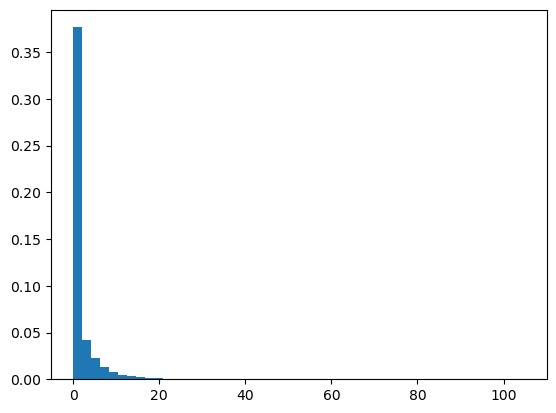

In [11]:
plt.hist(data_day,density=True,bins=50)
plt.show()

**Frage:** Denkt ihr das die Tageswerte des Niederschlages normalverteilt sind?

In [12]:
res = stats.shapiro(data_day)

/home/boeing/miniconda3/envs/gamm/lib/python3.10/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [13]:
if res.pvalue > 0.05:
    print("Die Nullhypothese das die Werte Normalverteilt sind, kann angenommen werden")
else:
    print("Die Nullhypothese das die Werte Normalverteilt sind, kann nicht angenommen werden")


Die Nullhypothese das die Werte Normalverteilt sind, kann nicht angenommen werden


**Aufgabe:** Teste, ob die Monatsdaten normalverteilt sind.

/home/boeing/miniconda3/envs/gamm/lib/python3.10/site-packages/scipy/integrate/_quadpack_py.py:1225: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/home/boeing/miniconda3/envs/gamm/lib/python3.10/site-packages/scipy/integrate/_quadpack_py.py:1225: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


sumsquare_error          aic          bic  kl_div   
chi2                  0.000335  1291.721997 -1644.422350     inf  \
recipinvgauss         0.000335  1295.059889 -1644.393456     inf   
invgamma              0.000335  1295.437040 -1644.348594     inf   
powernorm             0.000336  1290.706526 -1644.158065     inf   
chi                   0.000336  1290.783340 -1644.135069     inf   

               ks_statistic  ks_pvalue  
chi2               0.038751   0.986219  
recipinvgauss      0.040859   0.976454  
invgamma           0.041017   0.975574  
powernorm          0.042903   0.963331  
chi                0.043494   0.958813

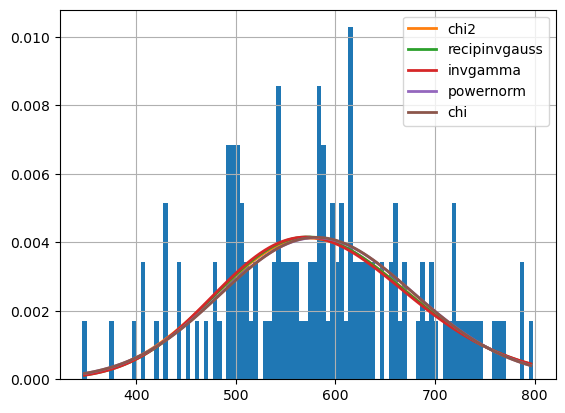

In [14]:
from fitter import Fitter
f = Fitter(data_year)
f.fit()
# may take some time since by default, all distributions are tried
# but you call manually provide a smaller set of distributions
f.summary()


In [15]:

f = Fitter(data_day)
f.fit()
# may take some time since by default, all distributions are tried
# but you call manually provide a smaller set of distributions
f.summary()
